# Проект по обработке и визуализации данных


## Цель проекта:

Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье.





## Часть 1: Исследуем данные






#### all_sites_scores.csv



Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb



#### fandango_scape.csv

Файл`fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import kdeplot

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [5]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


График scatterplot, показывающий связь между колонками RATING и VOTES

<Axes: xlabel='RATING', ylabel='VOTES'>

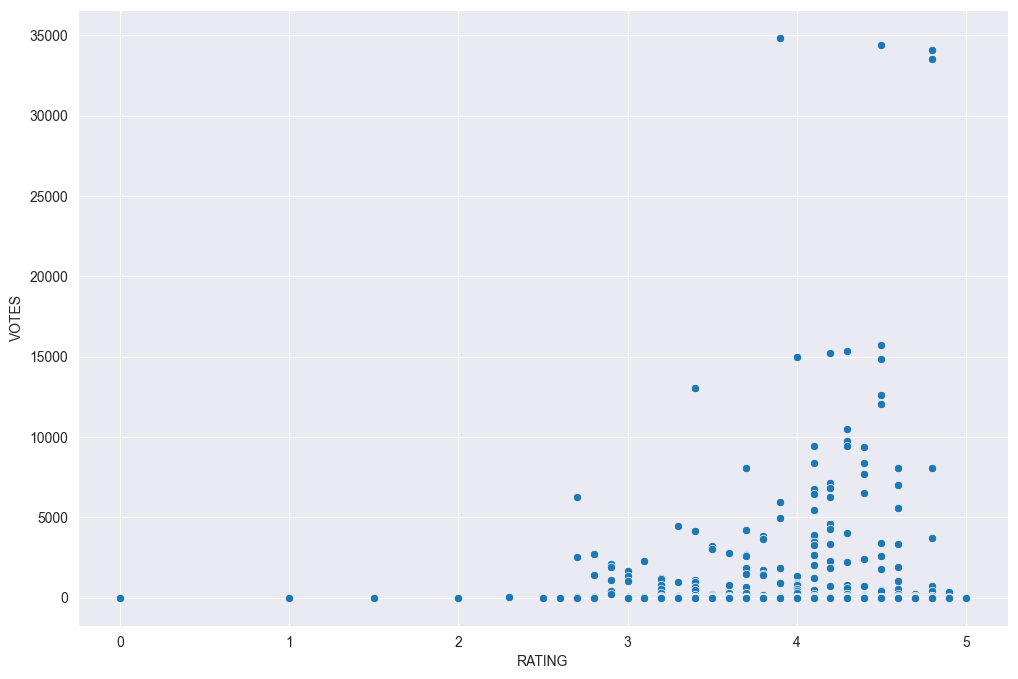

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = fandango, x = "RATING", y = "VOTES")


Корреляция между колонками

In [8]:
fandango.set_index("FILM").corr().round(5)

,STARS,RATING,VOTES
STARS,1.00000,0.99470,0.16422
RATING,0.99470,1.00000,0.16376
VOTES,0.16422,0.16376,1.00000


In [9]:
fandango['YEAR'] = fandango['FILM'].str.extract(r'\((\d{4})\)')
fandango.head()



,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


Количество фильмов содержащихся в наборе данных Fandango, в разбивке по годам

In [10]:
fandango['YEAR'].value_counts().sort_index()

YEAR
1964      1
2012      1
2014     24
2015    477
2016      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

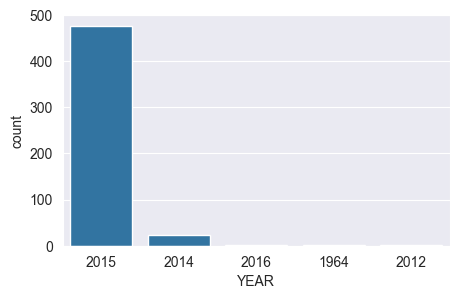

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(x = fandango['YEAR'])

10 фильмов получившие наибольшее количество голосов

In [12]:
fandango.nlargest(n = 10, columns = 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014




График KDEplot, который отображает распределение рейтингов STARS и истинных рейтингов на основе голосов пользователей RATING

<Axes: xlabel='RATING', ylabel='Density'>

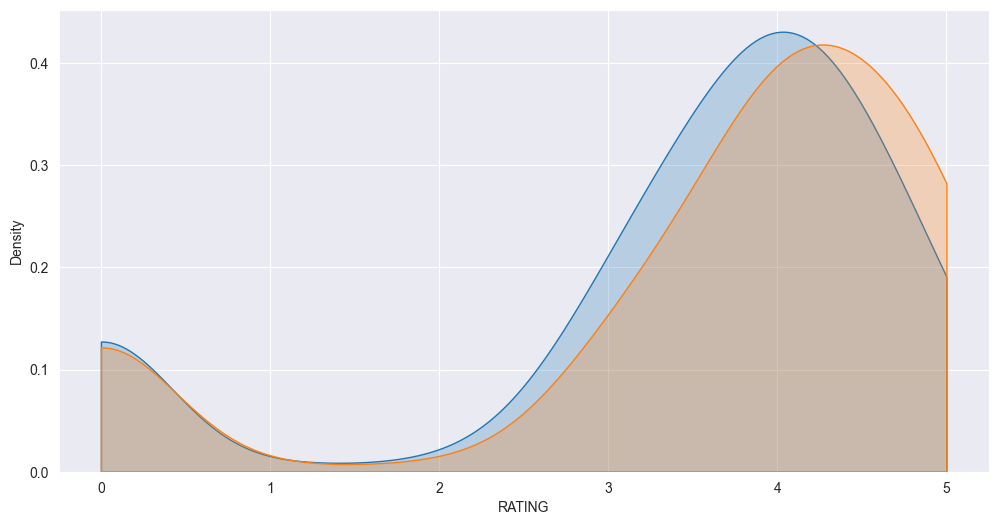

In [13]:
plt.figure(figsize=(12,6))
sns.kdeplot(data = fandango, x = "RATING", fill= True, clip =(0, 5))
sns.kdeplot(data = fandango, x = "STARS", fill= True, clip =(0, 5))


Колонка с разницей между колонками STARS и RATING

In [14]:
fandango["DIFFERENT"] = (fandango["STARS"] - fandango["RATING"]).round(1)
fandango.head()


,FILM,STARS,RATING,VOTES,YEAR,DIFFERENT
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


График count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING

<Axes: xlabel='DIFFERENT', ylabel='count'>

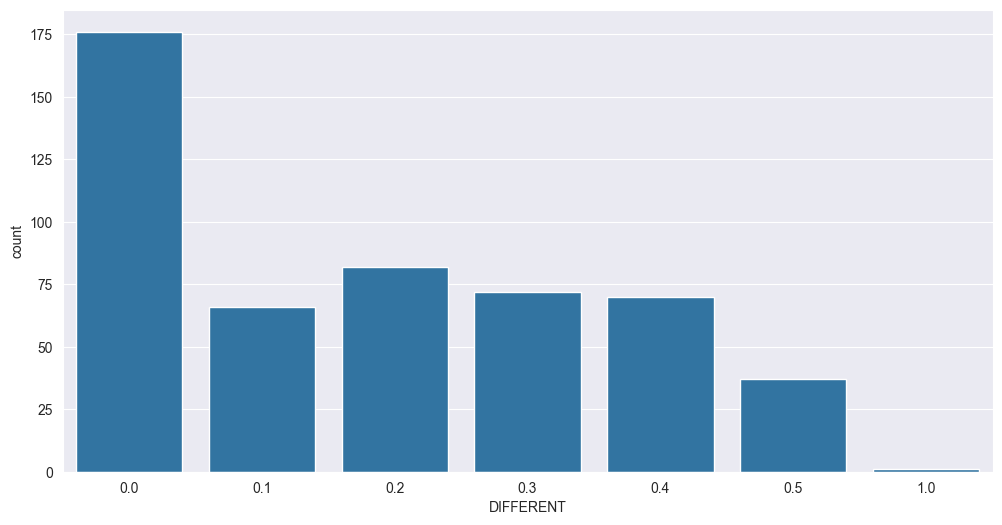

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x = fandango["DIFFERENT"])

Сравнение рейтингов Fandango с рейтингами других компаний


In [16]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [57]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


График scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

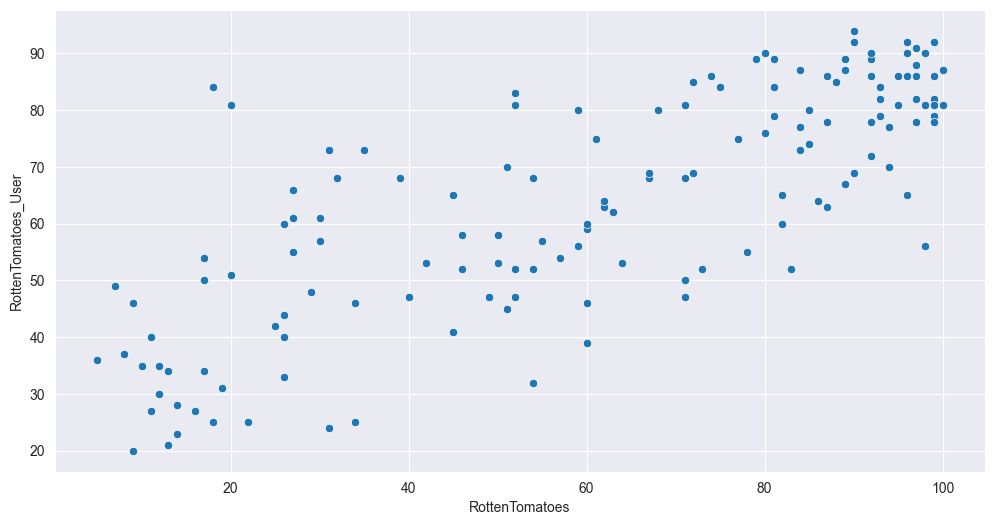

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = all_sites, x = "RottenTomatoes", y = "RottenTomatoes_User")



Новая колонку, в которой сохраним разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes

In [19]:
all_sites["Rotten_diff"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]
all_sites.head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Средняя абсолютная разница между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

In [20]:
all_sites["Rotten_diff"].apply(lambda x: abs(x)).mean()


np.float64(15.095890410958905)

График распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения

<Axes: xlabel='Rotten_diff', ylabel='Count'>

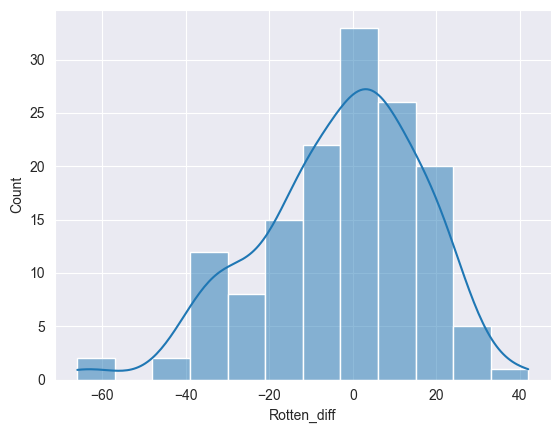

In [21]:
sns.histplot(data = all_sites, x= "Rotten_diff", kde = True)


График распределения абсолютных значений разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

<Axes: xlabel='Rotten_diff_abs', ylabel='Count'>

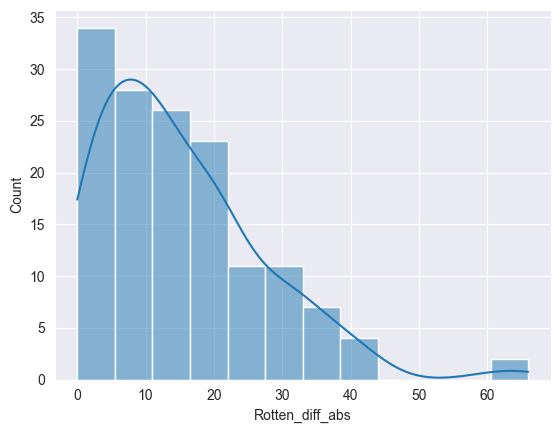

In [22]:
all_sites["Rotten_diff_abs"]=all_sites["Rotten_diff"].apply(lambda x: abs(x))
sns.histplot(data = all_sites, x= "Rotten_diff_abs", kde = True)


5 фильмов в среднем выше всего оцененные пользователями, по сравнению с оценками от критиков

In [23]:
all_sites.nsmallest(5, "Rotten_diff")[["FILM", "Rotten_diff"]]


,FILM,Rotten_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Наоборот - 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей

In [24]:
all_sites.nlargest(5, "Rotten_diff")[["FILM", "Rotten_diff"]]


,FILM,Rotten_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


График scatterplot для сравнения рейтингов Metacritic и Metacritic User

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

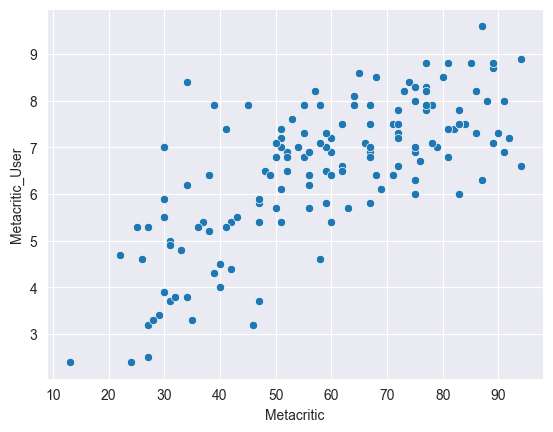

In [25]:
sns.scatterplot(data = all_sites, x = "Metacritic", y = "Metacritic_User")



График scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

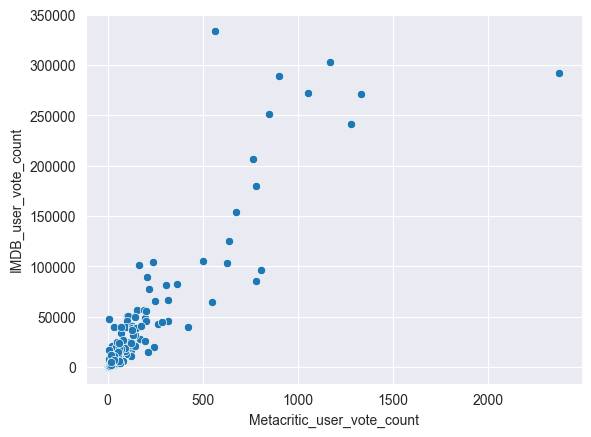

In [26]:
sns.scatterplot(data = all_sites, x = "Metacritic_user_vote_count", y = "IMDB_user_vote_count")


## Сравнение рейтингов Fandango с рейтингами других компаний


Объединим таблицу fandango с таблицей all_sites

In [28]:
pd.merge(all_sites, fandango, on = "FILM", how = "inner")


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff,Rotten_diff_abs,STARS,RATING,VOTES,YEAR,DIFFERENT
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12,5.0,4.5,14846,2015,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5,5.0,4.5,12640,2015,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10,5.0,4.5,12055,2015,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66,5.0,4.5,1793,2015,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14,3.5,3.0,1021,2015,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,9,4.0,4.0,1348,2015,0.0
141,'71 (2015),97,82,83,7.5,7.2,60,24116,15,15,3.5,3.5,192,2015,0.0
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,19,3.5,3.5,118,2014,0.0
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,19,3.5,3.5,59,2015,0.0


Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango


In [29]:
all_sites["RT_Norm"] = (all_sites["RottenTomatoes"] / 20).round(1)
all_sites["RT_U_Norm"] = (all_sites["RottenTomatoes_User"]/ 20).round(1)
all_sites["IMDB_norm"]= (all_sites["IMDB"]/  2).round(1)
all_sites["Meta_Norm"] = (all_sites["Metacritic"] / 20).round(1)
all_sites["Meta_U_Norm"]= (all_sites["Metacritic_User"]/  2).round(1)
all_sites.loc[all_sites["FILM"] == "Fifty Shades of Grey (2015)",
              ["FILM","RT_Norm","RT_U_Norm","IMDB_norm","Meta_Norm","Meta_U_Norm"]]


,FILM,RT_Norm,RT_U_Norm,IMDB_norm,Meta_Norm,Meta_U_Norm
97,Fifty Shades of Grey (2015),1.2,2.1,2.1,2.3,1.6


DataFrame, в котором только нормализованные рейтинги, также колонки STARS и RATING

In [30]:
all_sites = pd.merge(all_sites, fandango, on = "FILM", how = "inner")
norm_scores = pd.DataFrame(data=all_sites,columns=["RT_Norm","RT_U_Norm", "Meta_Norm", "Meta_U_Norm","IMDB_norm","STARS", "RATING" ])
norm_scores.head()



,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_norm,STARS,RATING
0,3.7,4.3,3.3,3.6,3.9,5.0,4.5
1,4.2,4.0,3.4,3.8,3.6,5.0,4.5
2,4.0,4.5,3.2,4.0,3.9,5.0,4.5
3,0.9,4.2,1.1,2.4,2.7,5.0,4.5
4,0.7,1.4,1.4,1.7,2.6,3.5,3.0


Сравнение распределений рейтингов от разных компаний

График kdeplot, сравнивающий распределения нормализованных рейтингов от всех компаний

<Axes: xlabel='Score', ylabel='Density'>

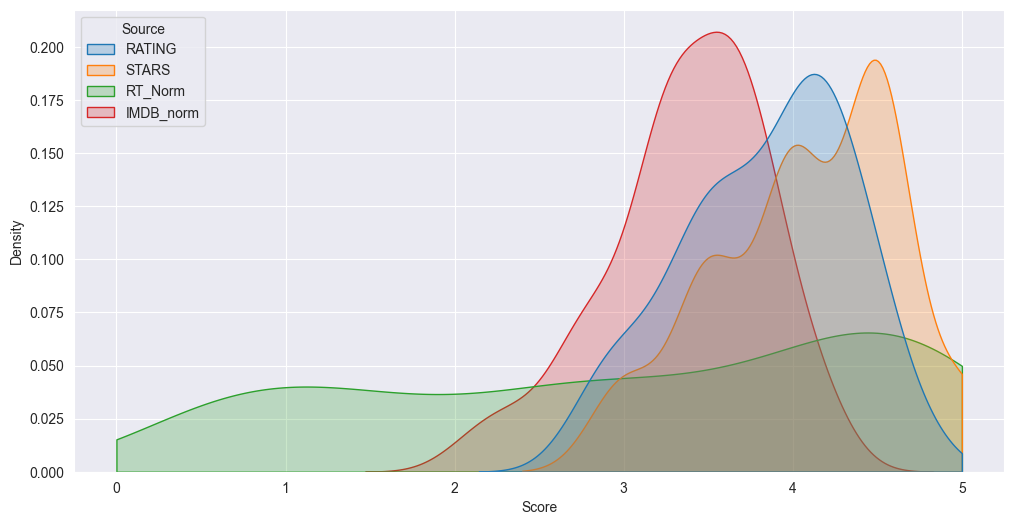

In [31]:
plt.figure(figsize=(12,6))
df_melted = norm_scores.melt(value_vars=["RATING","STARS","RT_Norm","IMDB_norm"],var_name="Source",value_name="Score")
sns.kdeplot(data=df_melted, x="Score", hue="Source", fill=True, clip=(0,5))

Мы сразу видим, что рейтинги Fandango очень сдвинуты вправо
График KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango

<Axes: xlabel='Score', ylabel='Density'>

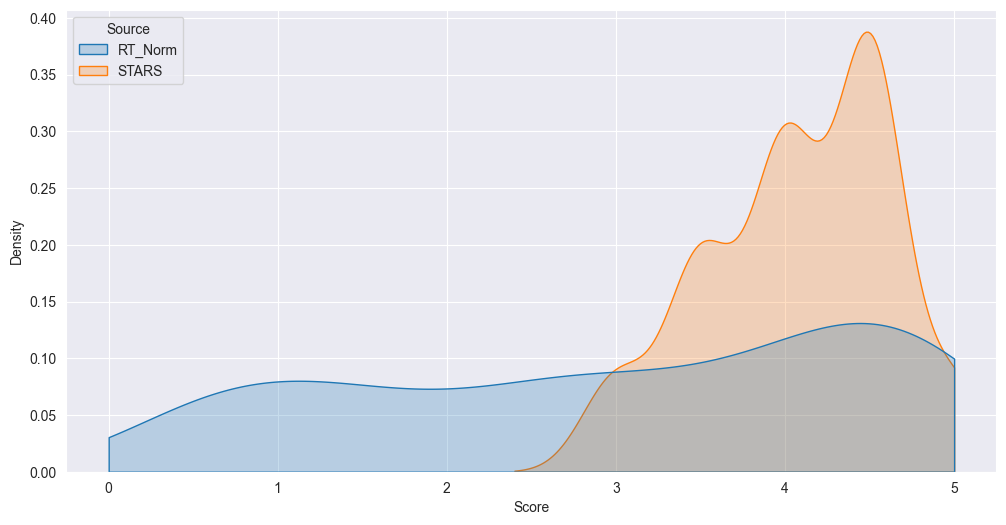

In [32]:
plt.figure(figsize=(12,6))
df_melted = norm_scores.melt(value_vars=["RT_Norm","STARS"],var_name="Source",value_name="Score")

sns.kdeplot(data=df_melted, x="Score", hue="Source", fill=True, clip=(0,5))


График histplot, сравнивающий все нормализованные рейтинги

<Axes: xlabel='Score', ylabel='Count'>

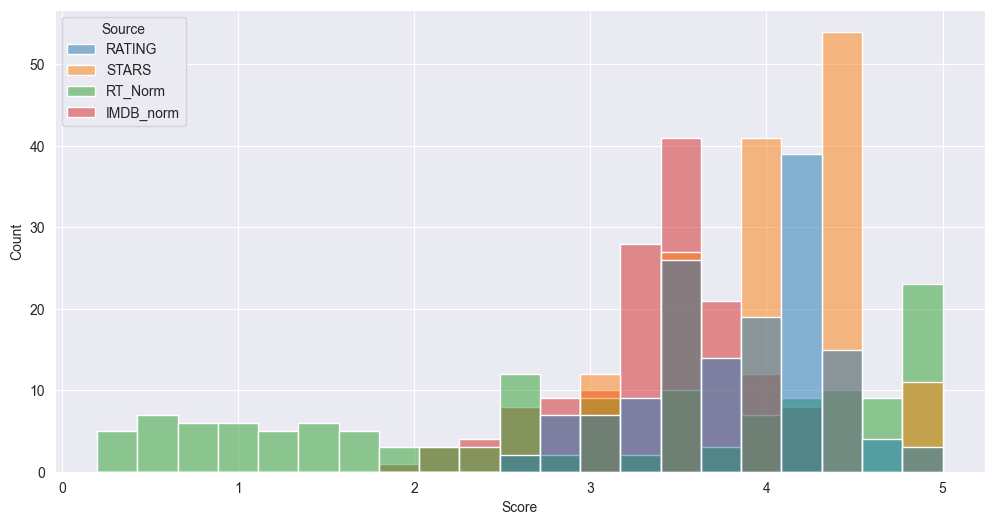

In [33]:
plt.figure(figsize=(12,6))
df_melted = norm_scores.melt( value_vars=["RATING","STARS","RT_Norm","IMDB_norm"],var_name="Source",value_name="Score")

sns.histplot(data=df_melted, x="Score", hue="Source", fill=True)




Как различные компании оценивают фильмы с наименьшими рейтингами?

График clustermap для всех нормализованных рейтингов

<Axes: >

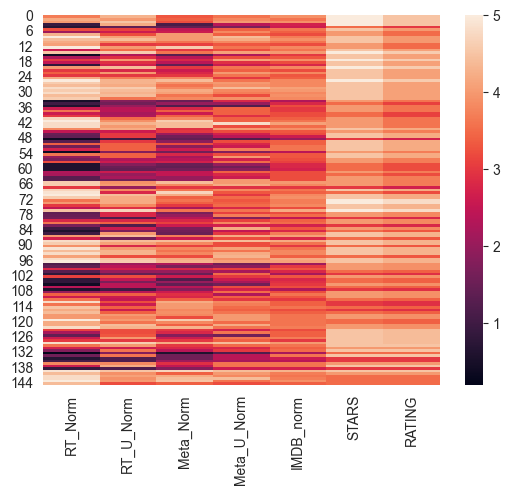

In [34]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
import scipy
sns.heatmap(data=norm_scores)


Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic

In [38]:
min_data = all_sites.nsmallest(10, "RT_Norm")[["RT_Norm","RT_U_Norm", "Meta_Norm", "Meta_U_Norm","IMDB_norm","STARS", "RATING", "FILM" ]]
min_data


,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_norm,STARS,RATING,FILM
132,0.2,1.8,0.6,1.2,2.2,3.5,3.5,Paul Blart: Mall Cop 2 (2015)
15,0.4,2.3,1.3,2.3,3.0,4.5,4.1,Taken 3 (2015)
48,0.4,1.0,1.4,1.2,2.0,3.0,2.7,Fantastic Four (2015)
53,0.4,1.8,1.6,1.8,2.4,4.0,3.7,Hot Pursuit (2015)
105,0.4,2.4,1.4,1.6,3.0,4.0,3.9,Hitman: Agent 47 (2015)
33,0.5,1.8,1.5,2.8,2.3,4.0,3.6,The Boy Next Door (2015)
35,0.6,2.0,1.2,1.2,3.2,4.0,3.6,The Loft (2015)
58,0.6,1.8,1.5,2.0,2.8,3.5,3.2,Seventh Son (2015)
59,0.6,1.5,1.4,1.6,2.8,3.5,3.2,Mortdecai (2015)
60,0.6,1.4,1.6,1.9,2.7,3.5,3.2,Unfinished Business (2015)


Визуализируйте распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами

<Axes: xlabel='Score', ylabel='Density'>

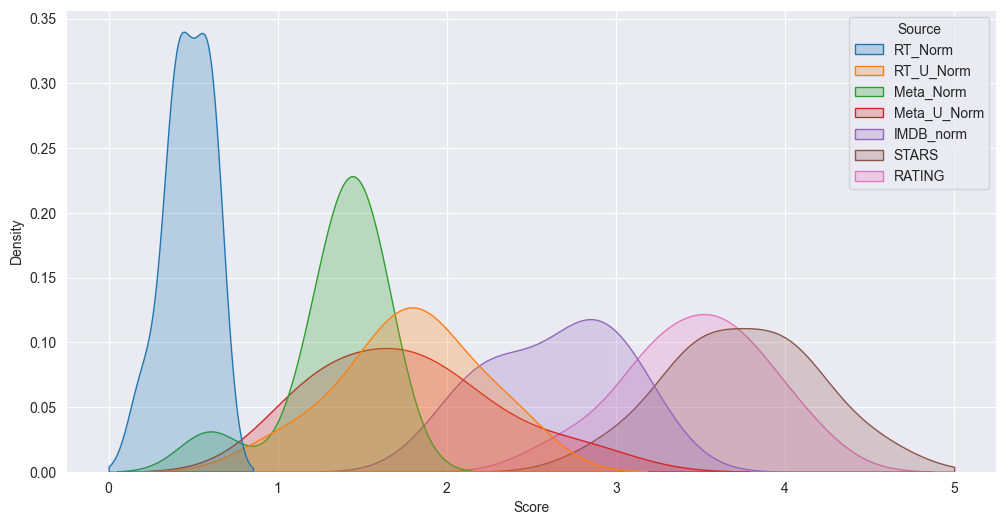

In [39]:
plt.figure(figsize=(12,6))
min_data = all_sites.nsmallest(10, "RT_Norm")[["RT_Norm","RT_U_Norm", "Meta_Norm", "Meta_U_Norm","IMDB_norm","STARS", "RATING", "FILM" ]]
df_final = min_data.melt(value_vars=["RT_Norm","RT_U_Norm", "Meta_Norm", "Meta_U_Norm","IMDB_norm","STARS", "RATING"],var_name="Source",
                         value_name="Score")
sns.kdeplot(data=df_final, x="Score", hue="Source", fill=True, clip=(0,5))


### Выводы

В ходе проекта мы:
- Объединили данные из различных источников (Fandango, RottenTomatoes, IMDb, Metacritic).
- Привели все рейтинги к единой шкале (0–5) с помощью нормализации, что позволило корректно сравнивать оценки разных сервисов.
- Построили графики распределений (KDE, histplot), чтобы наглядно сравнить кривые плотности для зрительских и критических оценок.
- Использовали тепловые карты и кластеризацию для анализа корреляций между источниками рейтингов.
- Выявили, что оценки пользователей и критиков не всегда совпадают, а некоторые фильмы имеют наибольшие расхождения в восприятии.

Таким образом, визуализация помогла понять, насколько различается восприятие фильмов зрителями и критиками, и какие сервисы дают наиболее схожие результаты.
